In [108]:
import pandas as pd

In [109]:
df = pd.read_csv("Open Hours Survey 2018.csv")

In [110]:
#df.columns

In [111]:
#word of mouth 15
#internet Search 14
# Passerby 41      - most people are just passerbys. We can likely increase our amount of attendees by improving this
# BBP Website 12
#Blog/messageboard/ article 3
#Other 4



In [112]:
age_df = df[["Children's ages, if applicable.","Age appropriate?"]]

In [113]:
#age_df

In [114]:
#age_df = age_df[pd.to_numeric(age_df["Children's ages, if applicable."], errors='coerce').notnull()]

In [115]:
age_df = age_df.replace(["Moderately", "Very", "Extremely"], [1,2,3])

In [116]:
#age_df.groupby("Children's ages, if applicable.", as_index=False).count()

In [117]:
#age_df["Children's ages, if applicable."]=pd.to_numeric(age_df["Children's ages, if applicable."])


In [118]:
#graph_set_up = age_df.groupby("Children's ages, if applicable.", as_index=False).mean().sort_values(by=["Children's ages, if applicable."])


In [119]:
#graph_set_up

In [120]:
#pd.to_numeric(graph_set_up["Children's ages, if applicable."])

In [121]:
#graph_set_up

In [122]:
age_df.loc[df['Children\'s ages, if applicable.'].astype(str).str.contains('mo', case=False), 'Children\'s ages, if applicable.'] = '1'



In [123]:
age_df["Children\'s ages, if applicable."] = age_df["Children\'s ages, if applicable."].str.replace("and", ",")

In [124]:
age_df["Children\'s ages, if applicable."]=age_df["Children\'s ages, if applicable."].str.split(',')

In [125]:
#age_df["Children\'s ages, if applicable."]=age_df["Children\'s ages, if applicable."].str.split('and')

In [126]:
age_df["Children\'s ages, if applicable."]

0                [1]
1                [2]
2          [2, 4, 6]
3                [4]
4                [4]
5               [15]
6                [4]
7             [4, 5]
8             [3, 7]
9                [8]
10               [6]
11            [5, 2]
12               [2]
13            [7, 5]
14           [12, 6]
15               [4]
16            [5, 3]
17            [3, 5]
18             [n/a]
19               [7]
20            [4, 5]
21               [7]
22               [1]
23            [2, 4]
24         [9, 6, 4]
25            [2, 5]
26           [3, 11]
27            [4, 5]
28            [3, 5]
29               [2]
           ...      
49               [2]
50            [5, 7]
51               [3]
52         [7, 3, 3]
53         [4, 5, 9]
54               [1]
55               [6]
56            [8, 9]
57               [4]
58         [3, 6, 8]
59               [6]
60               NaN
61            [4, 7]
62               [1]
63          [10, 14]
64               [6]
65           

In [127]:
age_df.head()

,"Children's ages, if applicable.",Age appropriate?
0,[1],2.0
1,[2],2.0
2,"[2, 4, 6]",3.0
3,[4],2.0
4,[4],3.0


In [128]:
import numpy as np

In [129]:
age_list  = []
rating_list = []
for index, row in age_df.iterrows():
    try:
        for val in row["Children's ages, if applicable."]:
            age_list.append(val)
            rating_list.append(row['Age appropriate?'])
    except:
        pass

In [130]:
len(age_list)
len(rating_list)

119

In [131]:
graph_df = pd.DataFrame({"Age":age_list, "Rating": rating_list})

In [132]:
graph_df['Age'] = graph_df['Age'].str.extract('(\d+)', expand=False)

In [133]:
graph_df = graph_df.dropna()

In [134]:
graph_df['Age'] = graph_df["Age"].astype(int)

In [135]:
amount_graph = graph_df.groupby("Age", as_index=False).count()

In [136]:
#amount_graph

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [138]:
sns.set()

In [139]:
#graph_df

In [140]:
#sns.barplot(graph)

In [141]:
grouped_graph_df = graph_df.groupby("Age", as_index=False).mean()

(-0.5, 8.5)

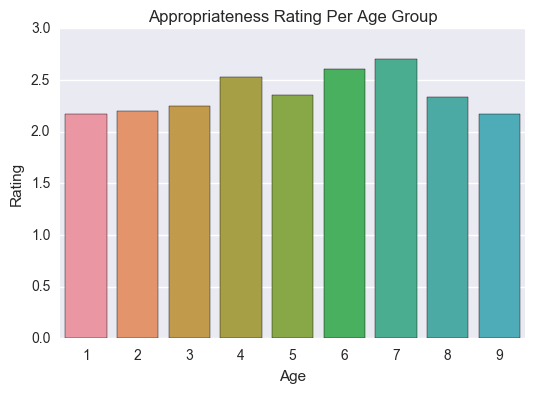

In [142]:
plot = sns.barplot(grouped_graph_df["Age"], grouped_graph_df["Rating"])
plot.set_title("Appropriateness Rating Per Age Group")
axes = plot.axes
axes.set_ylim(0,3)
axes.set_xlim(-0.5,8.5)

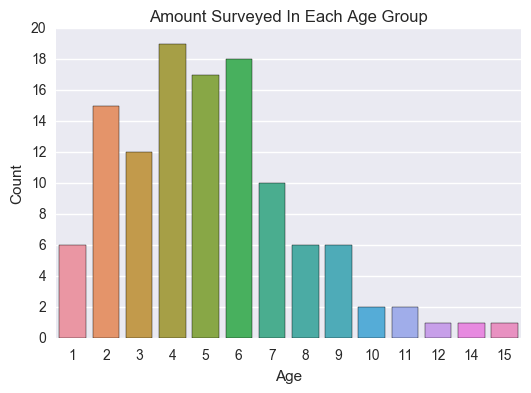

In [143]:
plot = sns.barplot(amount_graph["Age"], amount_graph["Rating"])
plot.set_title("Amount Surveyed In Each Age Group")
plot.set(yticks=range(0,21,2))
axes = plot.axes
axes.set_ylabel("Count")

#axes.set_ylim(0,20)
#axes.set_xlim(-0.5,9.5)

In [144]:
heard_df = df[["How did you hear about Open Hours in the Environmental Education Center? (Check all that apply.)", "How did you hear about Open Hours in the Environmental Education Center? (Check all that apply.).1","How did you hear about Open Hours in the Environmental Education Center? (Check all that apply.).2", "How did you hear about Open Hours in the Environmental Education Center? (Check all that apply.).3","How did you hear about Open Hours in the Environmental Education Center? (Check all that apply.).4", "How did you hear about Open Hours in the Environmental Education Center? (Check all that apply.).5"]]

In [195]:
#list(heard_df.count())

In [196]:
heard_dict = {"Word of Mouth":15, "Internet Search":14, "Passerby": 41,"BBP Website": 12, "Blog/Message Board/Article":3, "Other":4 }

In [197]:
heard_dict.keys()

['Passerby',
 'Internet Search',
 'Word of Mouth',
 'Blog/Message Board/Article',
 'Other',
 'BBP Website']

In [198]:
heard_dict

{'BBP Website': 12,
 'Blog/Message Board/Article': 3,
 'Internet Search': 14,
 'Other': 4,
 'Passerby': 41,
 'Word of Mouth': 15}

In [199]:
where_df = pd.DataFrame(heard_dict, index=[0])

In [200]:
where_df

,BBP Website,Blog/Message Board/Article,Internet Search,Other,Passerby,Word of Mouth
0,12,3,14,4,41,15


In [201]:
heard_dict.values()

[41, 14, 15, 3, 4, 12]

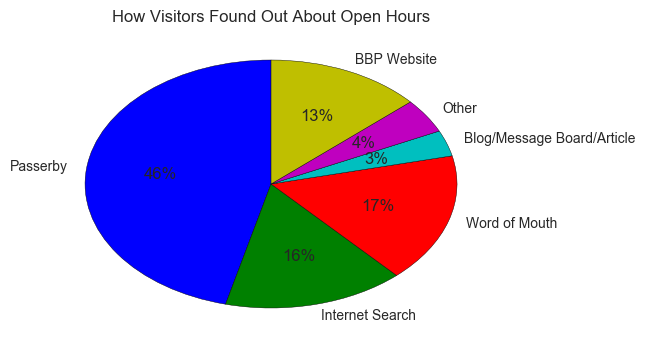

In [202]:
plt.pie(heard_dict.values(), labels = heard_dict.keys(), startangle=90, autopct='%0.f%%')
plt.title('How Visitors Found Out About Open Hours')
plt.savefig("Where People Find Out About Open Hours", bbox_inches='tight')

In [ ]:
len(heard_df)

In [ ]:
# num_list = []
# for num in list(age_df["Children's ages, if applicable."]):
#     num = str(num)
#     for nums in num.replace('and', ',').split(','):
#         num_list.append(nums)
#     #if "mo" in num:
        

In [ ]:
# final_num_list = []
# for num in num_list:
#     if "mo" in num:
#         final_num_list.append(1)
#     else:
#         try:
#             num = int(num)
#             final_num_list.append(num) 
#         except:
#             pass
        

In [ ]:
# final_num_list

## make df for other programs

In [147]:
other_df = df[df.columns.values[10:14]]

In [157]:
df2 =other_df.count()

In [67]:
programs = ["Adult Programs", "Special programs during Open Hours", "Self-guided outdoor activities", "Weekend morning classes"]

In [169]:
from textwrap import wrap

In [184]:
wrapped_programs = [ '\n'.join(wrap(l, 15)) for l in programs ]

In [186]:
for program in [0,1,2,3]:
    activity_dict[wrapped_programs[program]] = df2.values[program]

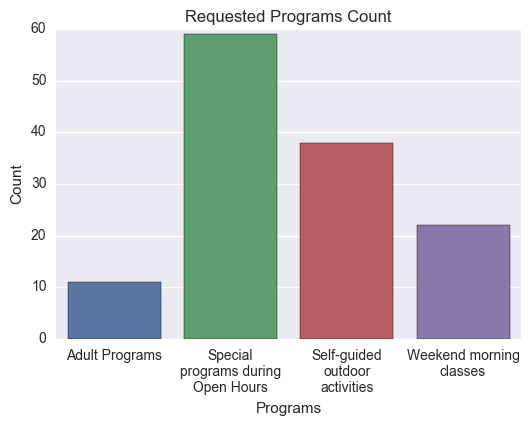

In [203]:
grph = sns.barplot(wrapped_programs, df2.values)
grph.set_title("Requested Programs Count")
grph.set_xlabel("Programs")
grph.set_ylabel("Count")
plt.savefig("Requested Programs Count",bbox_inches='tight')